# Bell State circuit on IBM-style real Backend
This notebook demonstrate the creation and measurement of a bell state : $ |\phi^+\rangle = \frac{|00>+|11>}2 $ using Qiskit.
Simulations are performed using Aer simulator with optional noise models to mimic real IBM Quantum Hardware.

### **Why We are not using real IBM Quantum Backend?**
In this notebook ,we do **not run the circuits on a real IBM Quantum Device**.Insted we simulate hardware behavior Qiskit's Aer simulator and noise models .Here's why:
1. **No creadits available:** 

    IBM Quantum requires credits to execute jobs on physical quantum device.Free trial are limited and often expires after 30 days.
2. **Queue & access limitations:** 

    Even if credits are available,real device have job queue that cause delay.
3. **Safety & Reproducibility:** 

    Simulation allows us to control & reproduce results reliably , which is essential for learning and debugging.
4. **Core learning Goal remain intact:** 

    The main objective-creating a Bell state ,understanding entanglement and studying the effect of noise.
5. **Industry-Standerd-Practice:** 

    most quantum algorithm devlopment and testing is done on simulators with realistic noise models.Real hardware runa are a bonus and not required for conceptual understanding.

By using simulator with noise model, we **faithfully mimic the behaviour of IBM hardware** while keeping the notebook fully **accessible and safe** for all users.

## Import Required libraries

In [ ]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer # Backend
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel,depolarizing_error #Noise Model
import matplotlib.pyplot as plt

## Create a Bell state circuit
the bell state $ |\phi^+\rangle$ is an entangled 2-qubit state.we perform following step to create bell state:
1. Apply Hadamard gate on qubit 0 --> create superposition.
2. Apply CNOT gate with qubit 0 as controls --> entangles qubit.
3. Measure the both Qubits
4. Visualize the circuit. 

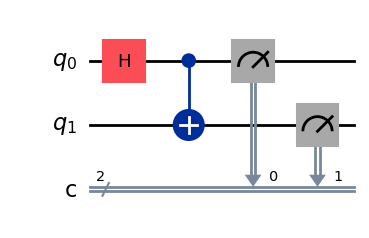

In [2]:
qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw('mpl')

## Ideal Simulation
- Run the circuit on a noise free simulator to verify ideal behavior.
- Expected outcomes : only 00 and 11 result appear.
- Provides a baseline for comparision with noisy hardware or noise simulation.

Ideal Simulator result: {'00': 499, '11': 525}


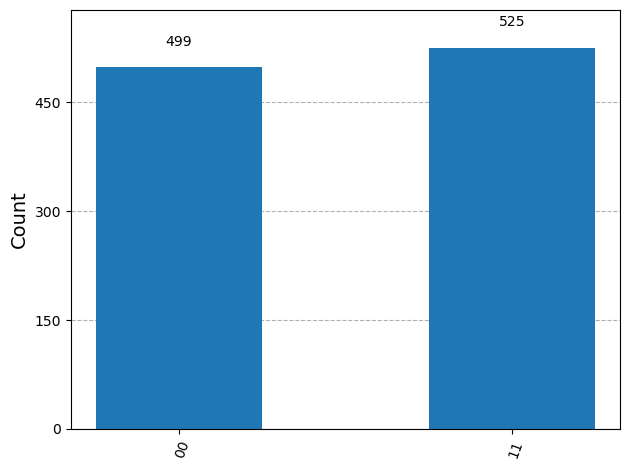

In [3]:
sim= Aer.get_backend("aer_simulator")
tqc=transpile(qc,sim)
job=sim.run(tqc,shots =1024)
result=job.result()
counts_ideal=result.get_counts()
print("Ideal Simulator result:",counts_ideal)
plot_histogram(counts_ideal)

## Add Noise Model(Optional,IBM-Like)
- To mimic real IBM hardware , we introduce **depolarizing noise**:
    - Single-qubit gate noise : 0.01 probability.
    - Two-qubit gate noise : 0.02 probability.
- This allows studying hardware-like errors without using real IBM devices.
- important learning:
    - Understanding decoherence
    - See how entanglement is affected by noise.


In [7]:
noise_model=NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.01,1),['h'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02,2),['cx'])

## Noisy Simulation
- Run the same circuit using the noise model.
- Compare results to ideal simulator.
- Observation:
    - 00 and 11 are dominant
    - Small probability of 01 and 10 due to noise.
- Help understand error effect on quantum circuits.

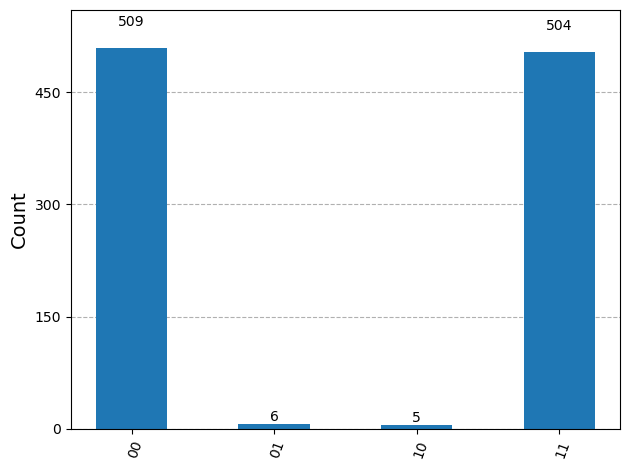

In [8]:
noisy_result=sim.run(transpile(qc,sim),noise_model=noise_model,shots=1024).result()
noise_counts=noisy_result.get_counts()
plot_histogram(noise_counts)

## Compare Ideal vs Noisy Results
- perfect entanglement in ideal case 
- imperfect results with noise(simulated hardware)
- Prepare for real hardware experiments once credit are available.


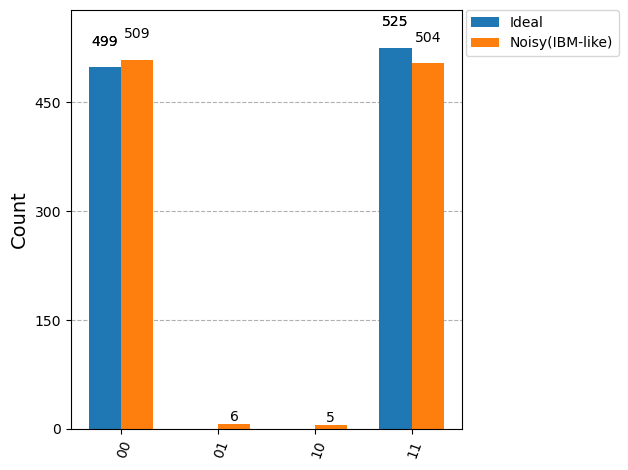

In [9]:
plot_histogram([counts_ideal,noise_counts],legend=["Ideal","Noisy(IBM-like)"])

In this notebook,we learned simulation of bell circuit on real IBM-like simulator and with noise model.**Real Hardware is optional;noise simulation preserves core learning goal**. 

--

**Author:** *Shreya Palase*  

**Date Created:**  *13-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day20_BellState_IBMSim.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>